# Advanced Topics in Data Science (CS5661). Cal State Univ. LA, CS Dept.
### Dr. Mohammad Porhoumayoun
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


# Data Science in Python

#### This is a review of data sceince libraries/packages in python. Feel free to refer to the suggested resources and documentaries for more details.

---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------


##### Note: The ANN Library that we use in this tutorial is available in the latest revision of SKLEARN (v0.18) and not in previous version (v0.17). Thus, make sure to update your sklearn. 
##### If you have ANACONDA, you can easily update that by running the following comand in the terminal (in Mac): "conda update scikit-learn"


# Artificial Neural Networks (ANN) 


In [26]:
# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Set up the Feature Matrix and Label Vector:

In [27]:
# "read_csv" is a pandas function to read csv files from web or local device:

cancer_df = pd.read_csv('/Users/mpourho/Documents/CSU/Courses/CS5661/Datasets/Cancer.csv')

# checking the dataset by printing every 10 lines:
cancer_df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [29]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape',
                'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',
                'Bland_Chromatin','Normal_Nucleoli','Mitoses']

# use the above list to select the features from the original DataFrame
X = cancer_df[feature_cols] 

# select a Series of labels (the last column) from the DataFrame
y = cancer_df['Malignant_Cancer']

# print the first 5 rows
#print(X.head())
#print(y.head())

#### Splitting the Dataset:

In [30]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(439, 9)
(439,)
(110, 9)
(110,)


# ANN Classifier
#### Defining (instantiating) an "object" from the sklearn class "MLPClassifier" (Multi-layer Perceptron (MLP)):

In [31]:
# "my_ANN" is instantiated as an "object" of MLPClassifier "class". 
# hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.
# activation: the non-linear function. 'logistic' means Sigmoid Function!
# solver: the type of minimization problem: ‘sgd’ and 'adam' refer to stochastic gradient descent.
# alpha: regularization parameter (L2 penalty term).
# learning_rate_init: learning rate.

# 1 Hidden Layer with 3 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(3,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1)



#### Training Stage: Training a predictive model using the training dataset:


In [32]:
# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [8]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

[array([[-0.3968898 , -0.10367394, -1.21724788],
       [-0.2120211 , -0.88836129, -1.29412533],
       [-0.13884129, -0.01775631, -1.05661747],
       [-0.02523639,  0.12324619, -0.82724479],
       [ 0.06532896,  0.60473916, -1.25246927],
       [-0.24286692, -1.05328169, -0.94857906],
       [-0.36829704,  0.02657509, -0.68563701],
       [-0.24922157, -0.35449112, -0.82823419],
       [-0.15312867, -0.4110709 , -1.18296452]]), array([[-6.1182427 ],
       [-3.74410958],
       [-0.20301399]])]


[array([ 5.31193363,  4.84089703, -0.53024459]), array([3.57422433])]


#### Testing (Prediction) Stage: Making prediction on new observations (Testing Data) using the trained model:


In [35]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

[0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0]


### Accuracy Evaluation:


In [34]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_ann = accuracy_score(y_test, y_predict_ann)
print(score_ann)


0.9363636363636364


### Repeating with a more complex Neural Network structure (2 Hidden Layers):


In [36]:
# "my_ANN" is instantiated as an "object" of MLPClassifier "class". 
# hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.
# activation: the non-linear function. 'logistic' means Sigmoid Function!
# solver: the type of minimization problem: ‘sgd’ and 'adam' refer to stochastic gradient descent.
# alpha: regularization parameter (L2 penalty term).
# learning_rate_init: learning rate.

# 2 Hidden Layers, first one with 6 neurons, second with 4 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(6,4), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1)

# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann)
print(score_ann)


0.9545454545454546


In [12]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

[array([[-0.3340985 ,  1.10539904, -0.45297341,  0.09834163,  0.55679987,
        -0.37326386],
       [-1.11887117,  0.75429695, -0.0077746 , -0.54092549,  0.72216786,
        -0.68106887],
       [-0.3775531 ,  1.2297153 , -0.32244636,  0.04146272,  0.76389592,
         0.00465701],
       [-0.1736861 ,  0.74112334, -0.3650256 , -0.12654149,  0.69726376,
         0.1052587 ],
       [ 0.31364912,  1.2494142 ,  0.15901967, -0.03637033,  0.54843399,
         0.33009643],
       [-0.93221964,  0.48822424, -0.10302661, -0.85869518,  0.87315679,
        -0.75551489],
       [-0.08914073,  1.22840214, -0.24651594, -0.29797592,  1.22025942,
        -0.3076308 ],
       [-0.45419659,  1.17302165, -0.278266  , -0.44828954,  1.11748522,
        -0.28544158],
       [-0.65111692,  0.70627561,  0.24584819, -0.41065643,  0.58174769,
        -0.65582642]]), array([[-3.21790965, -2.44835284,  3.04005594, -2.83571424],
       [ 0.32475323,  0.56374518, -0.67689139,  0.51880962],
       [-3.08185969,

## Estimating the Probability (likelihood) of happening the Event: 


In [13]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

[0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0] 

[[0.99497571 0.00502429]
 [0.01803603 0.98196397]
 [0.99527697 0.00472303]
 [0.99369818 0.00630182]
 [0.99499133 0.00500867]
 [0.99523605 0.00476395]
 [0.99515583 0.00484417]
 [0.9952783  0.0047217 ]
 [0.01755538 0.98244462]
 [0.01689823 0.98310177]
 [0.99360705 0.00639295]
 [0.99465678 0.00534322]
 [0.99431699 0.00568301]
 [0.99524649 0.00475351]
 [0.99350278 0.00649722]
 [0.03025881 0.96974119]
 [0.01682091 0.98317909]
 [0.01684079 0.98315921]
 [0.99484573 0.00515427]
 [0.99391195 0.00608805]
 [0.02550282 0.97449718]
 [0.03659343 0.96340657]
 [0.99515406 0.00484594]
 [0.99338251 0.00661749]
 [0.0169716  0.9830284 ]
 [0.99481891 0.00518109]
 [0.01776341 0.98223659]
 [0.01681329 0.98318671]
 [0.12036466 0.87963534]
 [0.02402792 0.97597208]
 [0.01796904 0.98203096]

# True Positive Rate (TPR) and False Positive Rate (FPR):

In [14]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[0.         0.         0.01851852 0.01851852 0.03703704 0.03703704
 0.05555556 0.05555556 0.07407407 0.07407407 0.38888889 0.44444444
 0.48148148 0.53703704 0.62962963 0.66666667 0.7037037  0.74074074
 0.75925926 0.7962963  0.85185185 0.90740741 0.96296296 1.        ]




[0.01785714 0.71428571 0.71428571 0.85714286 0.85714286 0.89285714
 0.89285714 0.96428571 0.96428571 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


# AUC:

In [37]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9894179894179893


# ROC Curve:

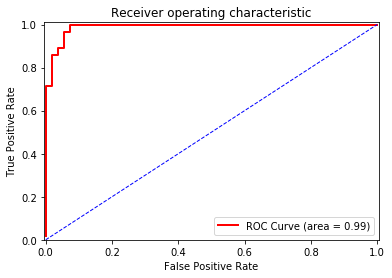

In [38]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Confusion Matrix:


In [17]:
from sklearn import metrics

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)

print("Confusion matrix:")
print(cm_ANN)


Confusion matrix:
[[49  5]
 [ 0 56]]


### Confusion Matrix when we have more than two labels:


In [39]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/mpourhoma/CS5661/master/iris.csv')

def categorical_to_numeric(x):
    if x == 'setosa':
        return 0
    elif x == 'versicolor':
        return 1
    elif x == 'virginica':
        return 2
    
iris_df['label'] = iris_df['species'].apply(categorical_to_numeric)

X = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

my_ANN = MLPClassifier(hidden_layer_sizes=(3,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1)

# Training on the training set:
my_ANN.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)

# Accuracy: 
score_ann = accuracy_score(y_test, y_predict_ann)
print(score_ann,'\n')

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)
print("Confusion matrix:")
print(cm_ANN)



1.0 

Confusion matrix:
[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


# Cross-Validation:

** We saw how to split the dataset into Training and Testing sets, Fit the model on "training set", and then predict on "testing set" to evaluate the accuracy. **

**The problem with this method is that the results may depend on the split. In other word, changing which data samples happen to be in the testing set can change the testing accuracy! For example, if you are lucky, some easily predictable samples may happen to be located in the testing set (or vice versa!). **

**In order to get more fair results, we can repeat the splitting process several times, compute the prediction accuracy for each split, and then average the results.**

**Cross Validation tries to reapeat the splitting procedure K times in a smart way such that all data samples will be used in "testing set" one time and in "Training Set" (K-1) times!**


## Three main steps for K-fold cross-validation
1. Split the dataset Randomly into K equal, non-overlapping sections.
2. Use one of the sections as **testing set** at a time and the union of the other (K-1) sections as the **training set**. Perform training stage, testing stage, and compute the accuracy based on the split each time. Repeat this procedure K times, so that each one of the K sections is used as **testing set** one time, and as a part of **training set** (K-1) times.
5. Calculate the average of the accuracies as final result.

Note: Using K=10 (10-fold cross-validation) is very common and recommended in machine learning.

## Cross-Validation in sklearn:

In [40]:
# importing the method:
from sklearn.model_selection import cross_val_score

### Applying 10-fold Cross Validation for ANN classifier:


In [41]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape',
                'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',
                'Bland_Chromatin','Normal_Nucleoli','Mitoses']

# use the above list to select the features from the original DataFrame
X = cancer_df[feature_cols] 

# select a Series of labels (the last column) from the DataFrame
y = cancer_df['Malignant_Cancer']


In [42]:
# Applying 10-fold cross validation with ANN classifier:

# 2 Hidden Layers, first one with 6 neurons, second with 4 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(3,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1)

# CV:
accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

print(accuracy_list)

[0.92857143 0.90909091 0.98181818 0.96363636 0.96363636 0.98181818
 0.94545455 0.98181818 0.98148148 1.        ]


#### Each element in "accuracy_list" above is the accuracy value in one of the K rounds of cross validation. We will use the average of them as the final accuracy for our model.

#### As we saw, the method "cross_val_score" will take care of everything, including splitting the data, forming Training and Testing sets (K times), Training and Testing the model (K times), and evaluating and reporting the accuracy for each round!

#### Now, we only need to calculate the average of the accuracies from K rounds!

In [22]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.9637325637325637


# How to find the best structure (the number of hidden layers and the number of neurons in each layer):
###### Several approaches have been propsed in articles for how to guess the number of hidden layers and  neurons. However, it mostly depends on the dataset. Comparing the results of traning/testing on traning data versus cross-validation can indicate when the system is entering overfitting stage. Maybe the most effective and the most popular approach for small to medium size datasets is brute force approach.

In [43]:
from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(1,9)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                           learning_rate_init = 0.1)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,)]} 

0.970856102003643
{'hidden_layer_sizes': (6,)}


In [44]:
from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,j) for i in range(1,9) for j in range(1,9)]                    

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, learning_rate_init = 0.1)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]} 

0.97632058287796
{'hidden_layer_sizes': (3, 6)}
